In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np
from itertools import product

from theory.transform import matrix_from_formula, remove_variables
from theory.fact_of_transform import create_factorisation_var_gadgets
from theory.represent import from_rank_1_list_to_WH

from theory.visual import InteractiveFactorPlot
from itertools import zip_longest

In [3]:
formula = "x * y + 2 * z + 2 *  z - 3 * u * v *  t - 4 * z - 5 * u * x + 1"
solution = dict(
    x=0.5,
    y=0.6,
    z=0.5,
    v=0.5,
    u=0.4,
    t=0.5
)

In [4]:
n_mat, v_mat, expected_rank_with_variables, fact_data = matrix_from_formula(formula)
n_mat_removed, v_mat_removed, exp_rank, g1_idx_by_var = remove_variables(n_mat, v_mat,
                                                              fact_data["ranges"],
                                                              expected_rank_with_variables)

terms = create_factorisation_var_gadgets(n_mat_removed, g1_idx_by_var, solution, fact_data)
W, H = from_rank_1_list_to_WH(terms)

-3*t*u*v - 5*u*x + x*y + 1
remove_variable u
remove_variable x
remove_variable _v_2_1
remove_variable t
remove_variable _v_3_1
remove_variable v
remove_variable _v_3_2
remove_variable _L
remove_variable y
remove_variable _v_1_1


<IPython.core.display.Javascript object>


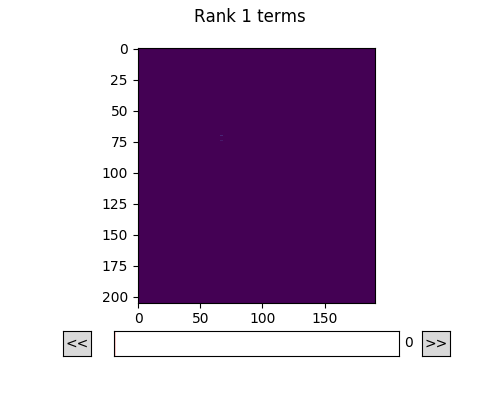

<IPython.core.display.Javascript object>


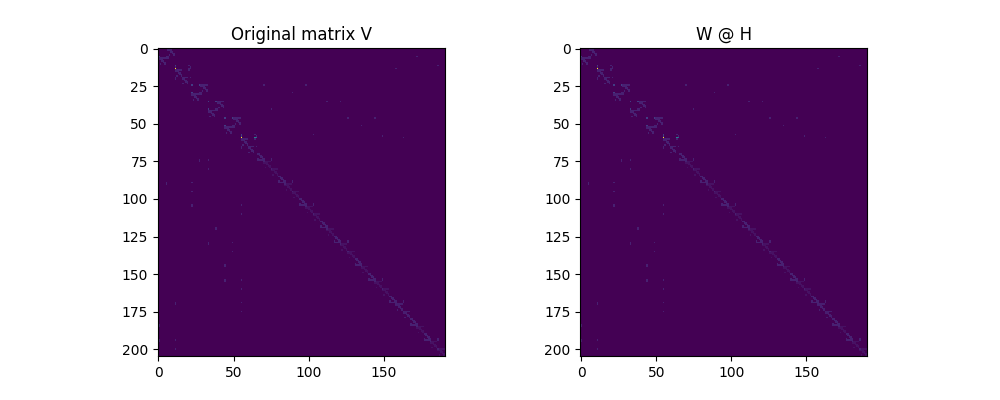

In [5]:
plot = InteractiveFactorPlot(W, H, n_mat_removed)

if False:
    for i, j in product(range(v_mat_removed.shape[0]), range(v_mat_removed.shape[1])):
        if v_mat_removed[i, j] == "":
            continue

        plot.ori_ax.text(j, i, v_mat_removed[i, j], color="white",
                 backgroundcolor="black",
                 horizontalalignment="center")

In [46]:
np.sum((W @ H - n_mat_removed) ** 2)

3.944304526105059e-31

In [6]:
s_idxs = fact_data["positive"]["s"]["idxs"] + fact_data["negative"]["s"]["idxs"] 
s_expanded_vars = fact_data["positive"]["s"]["expanded_vars"] + fact_data["negative"]["s"]["expanded_vars"] 

In [7]:
mask = np.full(n_mat_removed.shape, False, dtype=bool)

idx, expanded_vars = s_idxs[0], s_expanded_vars[0]
mask[:, :] = False
mask[idx] = True

terms_array = np.array(terms)
terms_i = [i for i in range(len(terms)) if np.any(terms[i][mask] > 0) and np.all(terms[i][~mask] == 0)]

<IPython.core.display.Javascript object>


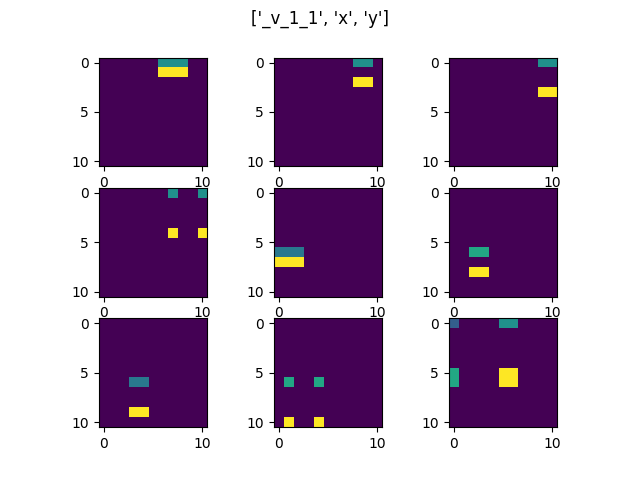

In [8]:
f, axs = plt.subplots(3, 3)
f.suptitle("{}".format(expanded_vars))

axs = axs.ravel()
for ax, i in zip(axs, terms_i):
    ax.imshow(terms[i][idx]) 

In [51]:
fact_data["positive"]["p"]

{'var_result': '_L',
 'vars': ['_v_1_1'],
 'coeffs': [1, 1.0],
 'idx': (slice(11, 24, None), slice(11, 22, None))}

In [9]:
p_idxs = [fact_data["positive"]["p"]["idx"], fact_data["negative"]["p"]["idx"]]
p_vars = [fact_data["positive"]["p"]["vars"], fact_data["negative"]["p"]["vars"]]
p_coeffs = [fact_data["positive"]["p"]["coeffs"], fact_data["negative"]["p"]["coeffs"]]

for i in range(len(p_vars)):
    coefs = p_coeffs[i]
    vars_ = p_vars[i]
    p_vars[i] = [v[0] for v in zip_longest(vars_, coefs, fillvalue="")]

In [10]:
mask_p = np.full(n_mat_removed.shape, False, dtype=bool)

idx, vars_ = p_idxs[0], p_vars[0]

mask_p[:, :] = False
mask_p[idx] = True

terms_array = np.array(terms)
terms_i = [i for i in range(len(terms)) if np.any(terms[i][mask_p] > 0) and np.all(terms[i][~mask_p] == 0)]

<IPython.core.display.Javascript object>


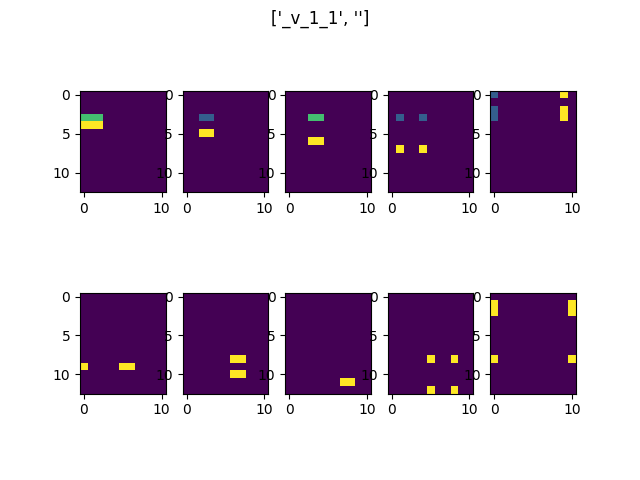

<IPython.core.display.Javascript object>


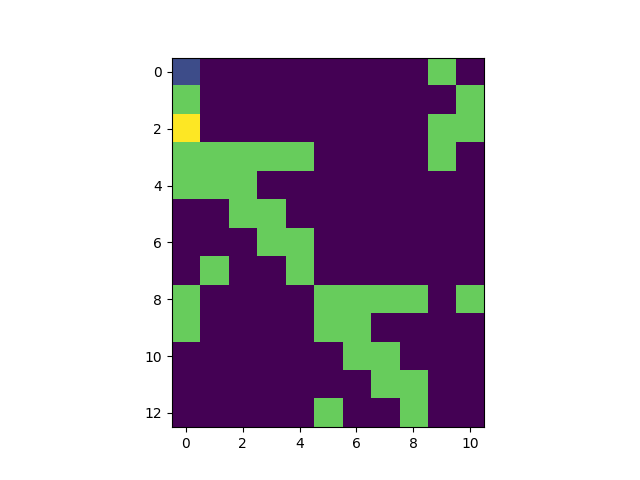

In [11]:
f, axs = plt.subplots(len(vars_), 5)
f.suptitle("{}".format(vars_))

axs = axs.ravel()
for ax, i in zip(axs, terms_i):
    ax.imshow(terms[i][idx]) 
    
s = np.sum([terms[i][idx] for i in terms_i], axis=0)
plt.figure()
plt.imshow(s)

In [83]:
def num_as_str(n):
    if n == 0:
        return ""
    if np.round(n) == n:
        return "{:.0f}".format(n)
    for i in range(1, 11):
        for j in range(1, 11):
            if np.abs(i / j - n) < 1e-6:
                return("{}/{}".format(i,j))

for row in n_mat_removed:
    print(" & ".join([num_as_str(i) for i in row]), r"\\")

2 &  &  &  &  & 2 & 1 & 1 & 1 & 1 & 1 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  & 1 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  & 1 &  &  &  &  &  &  &  &  &  \\
 &  &  &  &  &  & 1 & 1 & 1 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
 &  &  &  &  &  &  &  & 1 & 1 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
 &  &  &  &  &  &  &  &  & 1 & 1 &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
 &  &  &  &  &  &  & 1 &  &  & 1